In [10]:
#Project_1_Python_EDA/notebook/

In [9]:
# Exploratory Data Analysis of Sales Performance

## Objective
#The objective of this project is to analyze sales transaction data to identify revenue trends,
#top-performing products, and key business insights that support data-driven decision-making.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

In [12]:
df=pd.read_csv('/Users/macbook/Desktop/IT/cousera/datasets from kaggle/Sales.csv')
df.head()

,SalesId,StoreId,ProductId,Date,UnitPrice,Quantity
0,82319,22726,590,2019-12-02,0.0525,93
1,15022,21754,390,2017-11-19,5.1100,28
2,11624,71053,883,2020-07-13,7.3675,33
3,63101,22914,658,2019-05-12,2.0825,76
4,29702,22623,632,2020-07-20,0.6475,8


In [15]:
df.shape

(200000, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SalesId    200000 non-null  int64  
 1   StoreId    200000 non-null  int64  
 2   ProductId  200000 non-null  int64  
 3   Date       200000 non-null  object 
 4   UnitPrice  200000 non-null  float64
 5   Quantity   200000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.2+ MB


In [17]:
df.describe()

,SalesId,StoreId,ProductId,UnitPrice,Quantity
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,49997.590185,33720.734235,500.587255,3.313406,50.383910
std,23095.103021,23209.383882,288.611347,2.812360,28.870702
min,10000.000000,10002.000000,1.000000,0.017500,1.000000
25%,29959.000000,21791.000000,250.000000,1.277500,25.000000
50%,50048.000000,22728.000000,501.000000,2.765000,50.000000
75%,70043.000000,22960.000000,751.000000,4.287500,75.000000
max,90000.000000,85123.000000,1000.000000,21.157500,100.000000


In [18]:
## Data Overview
#The dataset contains sales transaction records including product details, pricing,
#quantity sold, and sales id. Initial inspection helps identify missing values,
#data types, and potential data quality issues.

In [19]:
df.isnull().sum()

SalesId      0
StoreId      0
ProductId    0
Date         0
UnitPrice    0
Quantity     0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
# i did not use df = df.drop_duplicates() because there is no duplicate.

In [22]:
df['Date']=pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   SalesId    200000 non-null  int64         
 1   StoreId    200000 non-null  int64         
 2   ProductId  200000 non-null  int64         
 3   Date       200000 non-null  datetime64[ns]
 4   UnitPrice  200000 non-null  float64       
 5   Quantity   200000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 9.2 MB


In [24]:
## Data Cleaning 
#Missing values and duplicate records were handled to ensure data accuracy.
#Date fields were converted to datetime format for time-based analysis.

In [25]:
df['Revenue']=df['Quantity']*df['UnitPrice']

In [26]:
df

,SalesId,StoreId,ProductId,Date,UnitPrice,Quantity,Revenue
0,82319,22726,590,2019-12-02,0.0525,93,4.8825
1,15022,21754,390,2017-11-19,5.1100,28,143.0800
2,11624,71053,883,2020-07-13,7.3675,33,243.1275
3,63101,22914,658,2019-05-12,2.0825,76,158.2700
4,29702,22623,632,2020-07-20,0.6475,8,5.1800
...,...,...,...,...,...,...,...
199995,57660,85123,682,2019-07-01,4.4625,75,334.6875
199996,18783,22727,656,2017-04-18,1.6800,30,50.4000
199997,25064,22912,831,2019-06-10,2.5025,60,150.1500
199998,43683,22622,902,2018-08-06,3.2025,98,313.8450


In [27]:
## monthly revenue trend

In [28]:
monthly_sales = (
    df.groupby(df['Date'].dt.to_period('M'))['Revenue']
    .sum()
    .reset_index()
)

monthly_sales['Date'] = monthly_sales['Date'].astype(str)
monthly_sales.head()


,Date,Revenue
0,2017-01,701304.6600
1,2017-02,634254.5300
2,2017-03,721855.8900
3,2017-04,700876.2425
4,2017-05,712926.7600


In [29]:
# Visualization

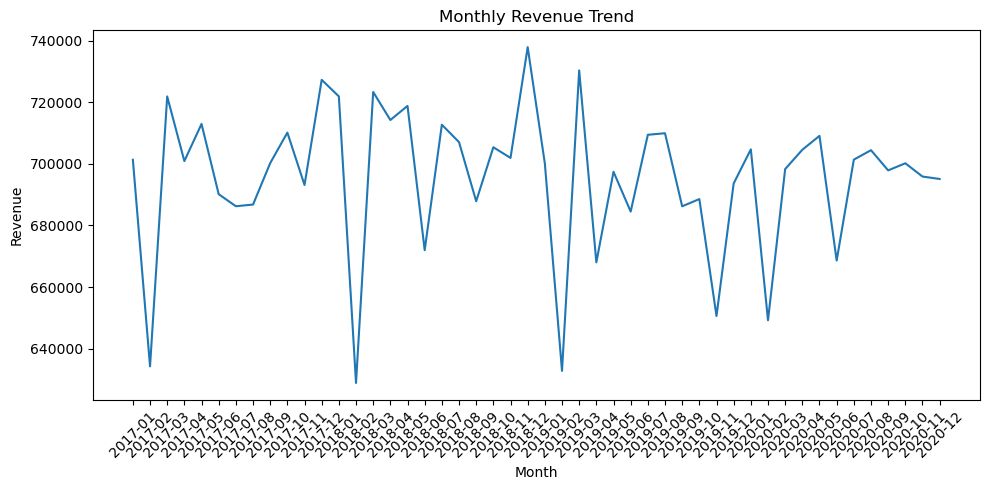

In [30]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Revenue'])
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [31]:
### Insight:
#Monthly revenue trends reveal periods of high and low performance, which can be used for sales planning and forecasting.


In [32]:
top_products = (
    df.groupby('ProductId')['Revenue'].sum().sort_values(ascending=False).head(10)
)

top_products

ProductId
248    223611.8500
117    197092.5600
885    195622.2450
89     182575.5750
845    167053.6525
99     160996.2900
88     156044.2625
367    153488.5800
805    152316.2550
149    145419.3825
Name: Revenue, dtype: float64

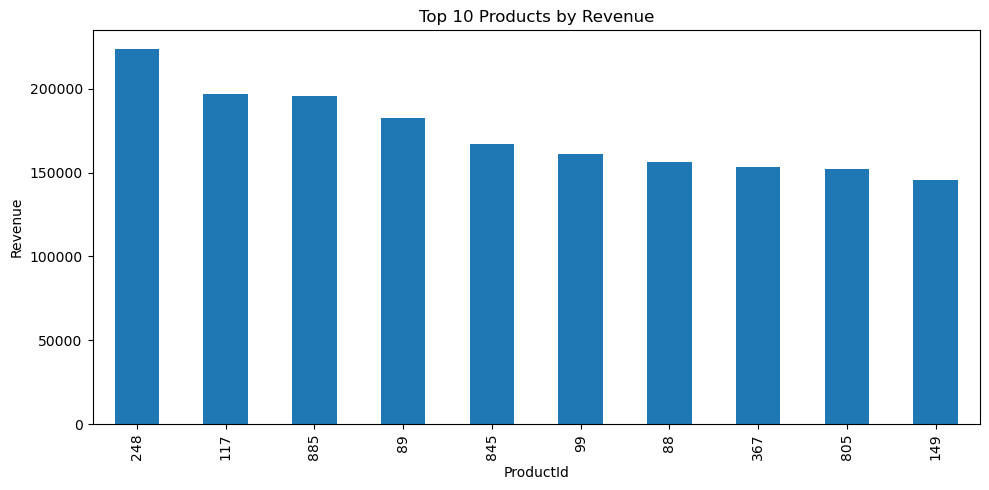

In [33]:
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('ProductId')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [34]:
## Key Insights & Recommendations

#- A small number of products generate the highest revenue.
#- Revenue trends indicate seasonal patterns that can inform inventory planning.
#- Businesses should focus marketing and stock optimization on top-performing products.


In [35]:
## Exploratory Data Analysis of Sales Performance

### Objective
#Analyze sales data to identify revenue trends and top-performing products.

### Tools
#- Python
#- Pandas
#- Matplotlib
#- Seaborn

### Key Insights
#- Identified monthly revenue trends
#- Highlighted top products by revenue
#- Provided business recommendations
